Predictions: [ 3.39868340e-17  1.00000000e+00  1.00000000e+00 -1.30949025e-18]
Mean Squared Error: 4.034854775648564e-32


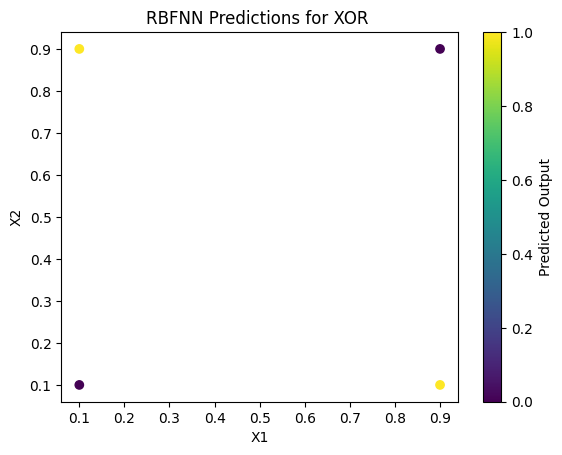

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class RBFNN:
    def __init__(self, sigma):
        self.sigma = sigma
        self.centers = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        self.weights = None

    def _gaussian(self, x, c):
        return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * self.sigma ** 2))

    def _calculate_activation(self, X):
        activations = np.zeros((X.shape[0], self.centers.shape[0]))
        for i, center in enumerate(self.centers):
            for j, x in enumerate(X):
                activations[j, i] = self._gaussian(x, center)
        return activations

    def fit(self, X, y):
        # Calculate activations
        activations = self._calculate_activation(X)

        # Initialize and solve for weights
        self.weights = np.linalg.pinv(activations.T @ activations) @ activations.T @ y

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model not trained yet. Call fit method first.")

        activations = self._calculate_activation(X)
        return activations @ self.weights


# Example usage:
if __name__ == "__main__":
    # Define XOR dataset
    X = np.array([[0.1, 0.1], [0.1, 0.9], [0.9, 0.1], [0.9, 0.9]])
    y = np.array([0, 1, 1, 0])

    # Initialize and train RBFNN
    rbfnn = RBFNN(sigma=0.1)
    rbfnn.fit(X, y)

    # Predict
    predictions = rbfnn.predict(X)
    print("Predictions:", predictions)

    # Calculate mean squared error
    mse = np.mean((predictions - y) ** 2)
    print("Mean Squared Error:", mse)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
    plt.colorbar(label='Predicted Output')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('RBFNN Predictions for XOR ')
    plt.show()
